# NAME: DEBARSHI CHAKRABORTY

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN @THE SPARKS FOUNDATION
# GRIP MAY 2021 - TASK 1:PREDICTION USING SUPERVISED ML

# Import Libraries

In [1]:
#first we import the libraries which we may need for our task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Check out the Data

In [2]:
#Now we get our data from the provided URL
print("THE DATA IS:")
df=pd.read_csv('http://bit.ly/w-data')
df

THE DATA IS:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


So,we can see that in the given dataset, there are two variables. Let **y denote the percentage of marks scored by a student** and **x denote how many hours did that student study**. Here , we are to predict y based on the value of x i.e. y is the response/dependent variable and x is the predictor/independent variable.

It seems that a simple linear regression should work fine here.
However, let us try to visualize it first.

# Visualize the Data

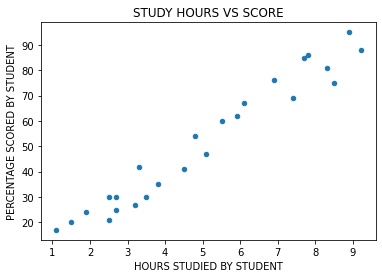

In [3]:
#plotting study hours vs scores
df.plot(x='Hours',y='Scores',kind='scatter',style='o')
plt.title('STUDY HOURS VS SCORE')  
plt.xlabel('HOURS STUDIED BY STUDENT')  
plt.ylabel('PERCENTAGE SCORED BY STUDENT')  
plt.show()

From the diagram,it seems that there exists a strong positive linear relationship between x aand y.Let's confirm by a
valid measure.

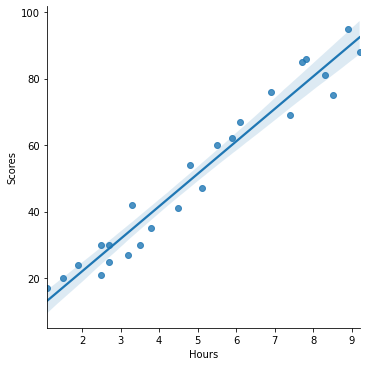

In [4]:
sns.lmplot(x='Hours',y='Scores',data=df)

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Pearson's Product moment correlation coefficient comes out to be 0.97** , very much close to 1 , which ensures the strong  linear relation between the two variables. Now , we proceed to execute Linear regression without any doubt.

# Training a Linear Regression Model

**create x and y arrays**

In [6]:
x = df.iloc[:,:-1].values
y = df['Scores'].values

**Train Test split**

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

**Creating and Training the Model**

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [9]:
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

**Let our model be y = a + bx then a is the intercept and b is the co-efficient here**


In [10]:
a= lm.intercept_
b=lm.coef_
print(a,b)

2.1024930747922284 [9.96651548]


intercept **a = 2.102** is fixed for all the students, it is like an average/overall effect.
co-efficient **b = 9.966** indicates that for an unit increase in the value of the predictor(study hours) **x** the response variable(percentage score) will increase by **9.966** units.

# Predictions from our Model
**Let us get the predictions using our model and see how well we did**

In [11]:
predictions = lm.predict(x_test)

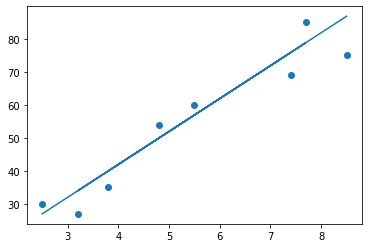

In [12]:
# Plotting the regression line
# Plotting for the test data
plt.scatter(x_test, y_test)
plt.plot(x_test, predictions);
plt.show()

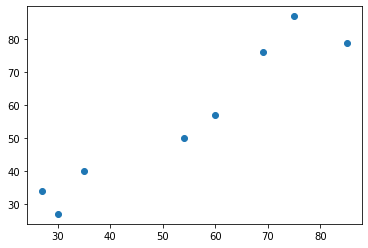

In [13]:
plt.scatter(y_test,predictions)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [14]:
from sklearn import metrics

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


In [16]:
hour = 9.25
score = a + b * hour
print(score)

[94.29276126]


**Therefore, putting x = 9.25 (hours studied) in our model y = a + bx we get y = 94.29**
i.e. if a student studies 9.25 hours per day , our model predicts that he/she would score 94.29 % marks